**Problem Statement:**

Analyze retail and warehouse performance over time, identify top and underperforming suppliers and items, evaluate profitability, and generate business insights using SQL, Python, and Tableau.

Dataset Structure:

YEAR, MONTH → Time Dimension

SUPPLIER → Supplier Analysis

ITEM CODE, ITEM DESCRIPTION, ITEM TYPE → Product Dimension

RETAIL SALES, RETAIL TRANSFERS, WAREHOUSE SALES → Sales Channels

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [ ]:

# Load dataset
df = pd.read_csv('/content/Retail and wherehouse Sale.csv')

# Create a DATE column
df['DATE'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str) + '-01')

# Fill missing values (if any)
df.fillna(0, inplace=True)

# Calculate total sales and profitability proxy
df['TOTAL SALES'] = df['RETAIL SALES'] + df['RETAIL TRANSFERS'] + df['WAREHOUSE SALES']


In [ ]:
df

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,DATE,TOTAL SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0,2020-01-01,2.00
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0,2020-01-01,5.00
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0,2020-01-01,1.00
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0,2020-01-01,1.00
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0,2020-01-01,0.82
...,...,...,...,...,...,...,...,...,...,...,...
29995,2020,3,"THE COUNTRY VINTNER, LLC DBA WINEBOW",352322,FORTALEZA ANEJO TEQUILA - 750ML,LIQUOR,0.33,0.0,0.0,2020-03-01,0.33
29996,2020,3,OSLO ENTERPRISE,352324,DOMAINE BRICHOT BLANC - 750ML,WINE,0.00,0.0,0.0,2020-03-01,0.00
29997,2020,3,OPICI FAMILY DISTRIBUTING OF MD,352354,LOTE 44 MALBEC - 750ML,WINE,0.00,0.0,6.0,2020-03-01,6.00
29998,2020,3,CAMPARI AMERICA LLC,35238,SKYY VODKA - 1.75L,LIQUOR,329.04,302.0,0.0,2020-03-01,631.04


In [ ]:
# Top 5 suppliers by total sales
top_suppliers = df.groupby('SUPPLIER')['TOTAL SALES'].sum().sort_values(ascending=False).head()
top_suppliers

,TOTAL SALES
SUPPLIER,
CROWN IMPORTS,201333.62
ANHEUSER BUSCH INC,156974.66
MILLER BREWING COMPANY,139906.08
HEINEKEN USA,103198.20
DIAGEO NORTH AMERICA INC,47893.88


In [ ]:
# Monthly sales trend
monthly_trend = df.groupby(['DATE'])[['RETAIL SALES', 'WAREHOUSE SALES']].sum()
monthly_trend

,RETAIL SALES,WAREHOUSE SALES
DATE,,
2020-01-01,74318.77,284114.72
2020-03-01,34523.90,113305.22
2020-07-01,94538.96,418094.42
2020-09-01,4805.31,7416.57


In [ ]:
# Slow-moving items
slow_items = df.groupby(['ITEM CODE', 'ITEM DESCRIPTION'])['TOTAL SALES'].sum()
slow_items = slow_items[slow_items < 5000].sort_values()
slow_items.head(10)

,,TOTAL SALES
ITEM CODE,ITEM DESCRIPTION,
175,EMPTY 1/2 KEG (30.00),-9620.00
205,EMPTY 1/6 KEG (30.00),-1858.00
BC,BEER CREDIT,-1218.00
264,EMPTY 1/4 KEG (30.00),-621.00
WC,WINE CREDIT,-111.00
1279,EMPTY WINE KEG - KEGS,-16.00
84089,KORBEL ORGANIC BRUT CHAMPAGNE - 750ML,-2.53
26350,LEINENKUGEL SNOW DRIFT VANILLA PRTR 1/2 KG,-2.00
354182,NEYERS LEFT BANK RED - 750ML,-1.00


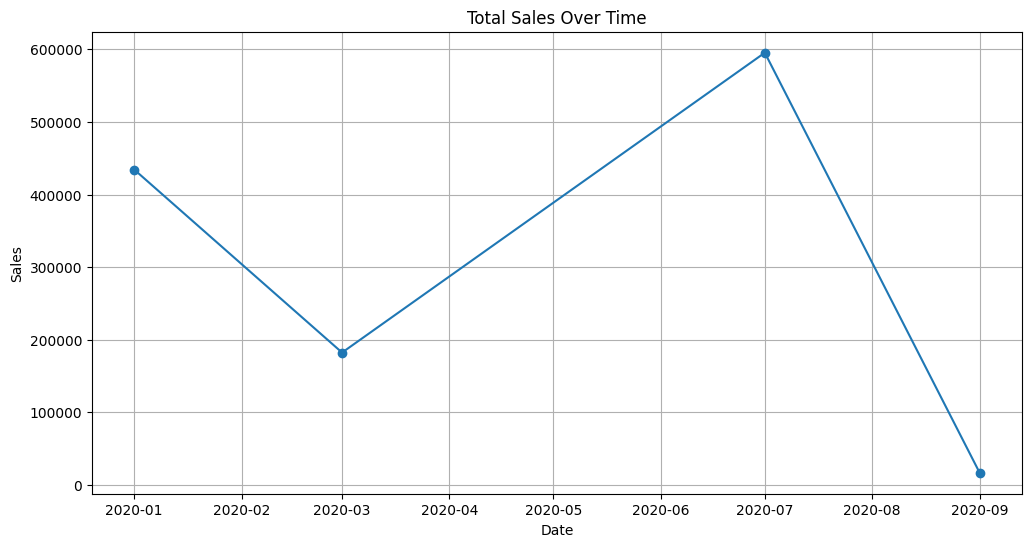

In [ ]:
#  Total Sales Over Time

monthly_sales = df.groupby('DATE')['TOTAL SALES'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['DATE'], monthly_sales['TOTAL SALES'], marker='o')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


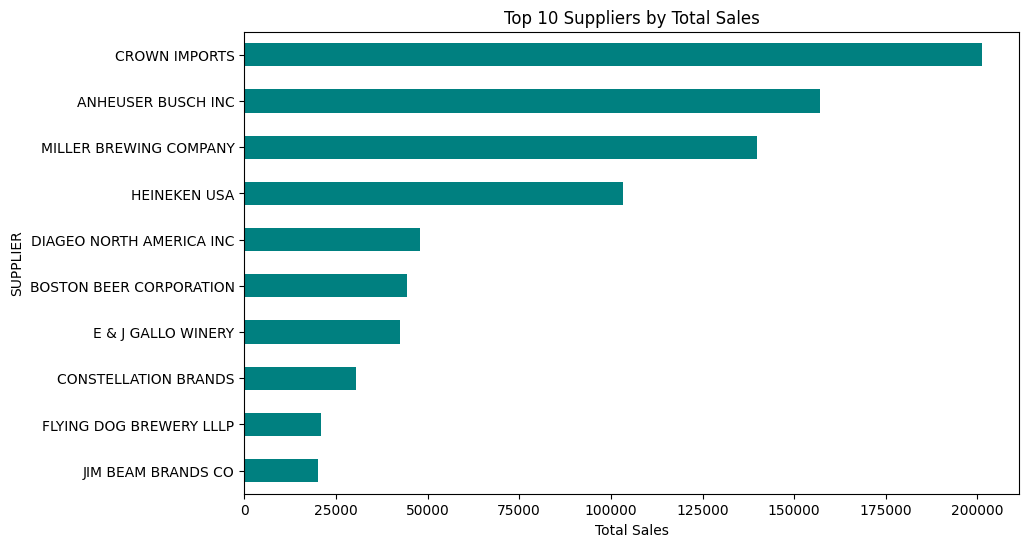

In [ ]:
# Supplier Performance Analysis

top_suppliers = df.groupby('SUPPLIER')['TOTAL SALES'].sum().sort_values(ascending=False).head(10)

top_suppliers.plot(kind='barh', figsize=(10, 6), color='teal')
plt.title("Top 10 Suppliers by Total Sales")
plt.xlabel("Total Sales")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# Slow Moving Items Detection

slow_items = df.groupby(['ITEM CODE', 'ITEM DESCRIPTION'])['TOTAL SALES'].sum().reset_index()
slow_items = slow_items[slow_items['TOTAL SALES'] < 5000].sort_values(by='TOTAL SALES')

print("📌 Slow Moving Items:")
print(slow_items.head(10))


📌 Slow Moving Items:
      ITEM CODE                            ITEM DESCRIPTION  TOTAL SALES
1257        175                       EMPTY 1/2 KEG (30.00)     -9620.00
1503        205                       EMPTY 1/6 KEG (30.00)     -1858.00
15767        BC                                 BEER CREDIT     -1218.00
3626        264                       EMPTY 1/4 KEG (30.00)      -621.00
15768        WC                                 WINE CREDIT      -111.00
553        1279                       EMPTY WINE KEG - KEGS       -16.00
14876     84089       KORBEL ORGANIC BRUT CHAMPAGNE - 750ML        -2.53
3621      26350  LEINENKUGEL SNOW DRIFT VANILLA PRTR 1/2 KG        -2.00
8764     354182                NEYERS LEFT BANK RED - 750ML        -1.00
7701     347177   DOM FOUASSIER SAN LES CHASSEIGNES - 750ML        -1.00


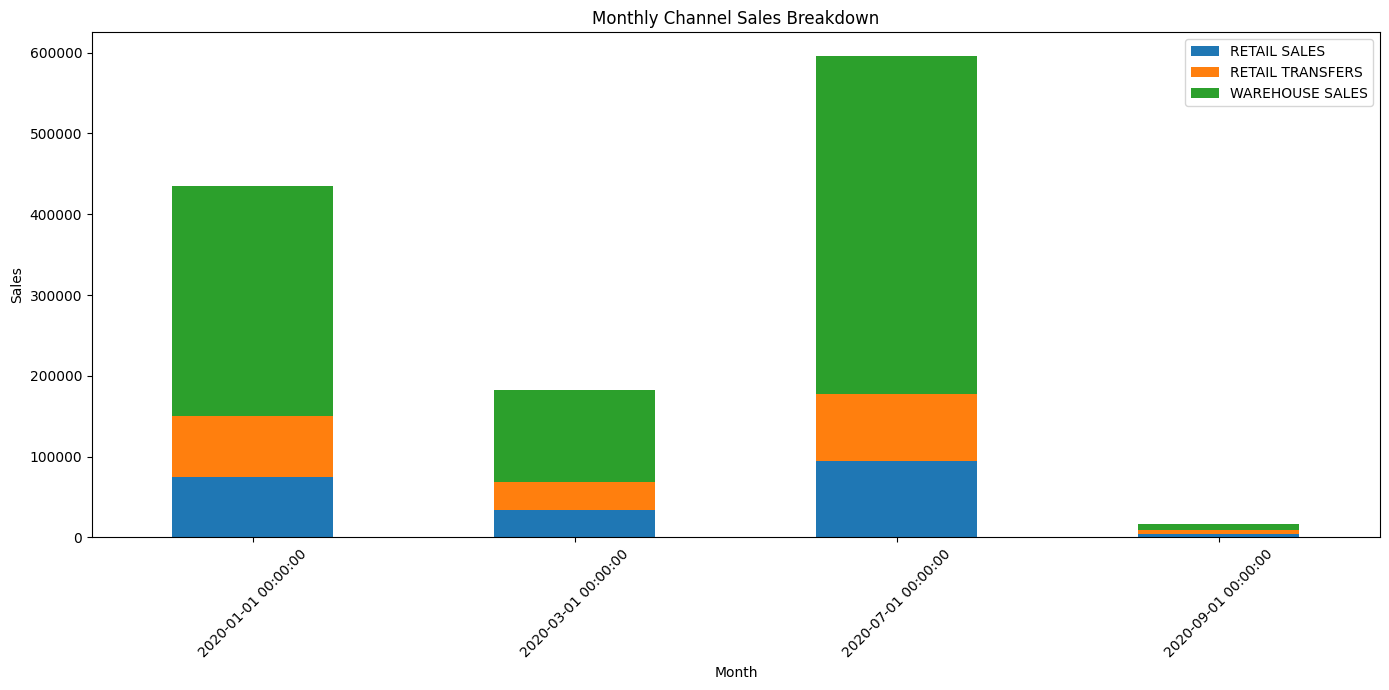

In [ ]:
# Monthly Channel Sales Breakdown

channel_trend = df.groupby('DATE')[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']].sum()

channel_trend.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title("Monthly Channel Sales Breakdown")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


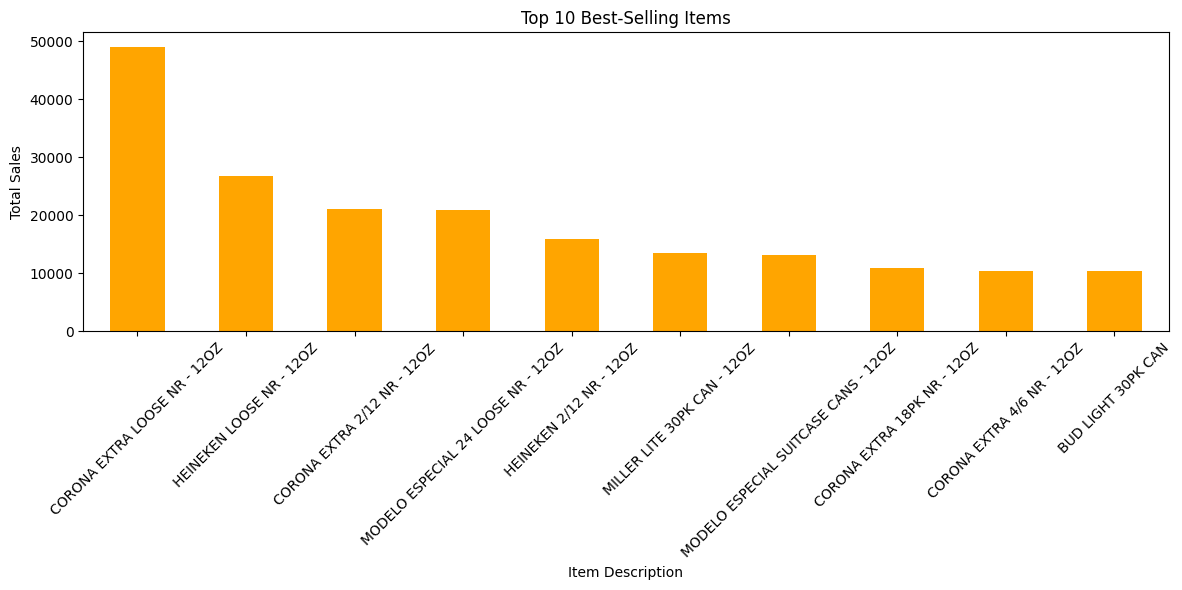

In [ ]:
# Top Items by Sales
top_items = df.groupby('ITEM DESCRIPTION')['TOTAL SALES'].sum().sort_values(ascending=False).head(10)

top_items.plot(kind='bar', figsize=(12, 6), color='orange')
plt.title("Top 10 Best-Selling Items")
plt.xlabel("Item Description")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


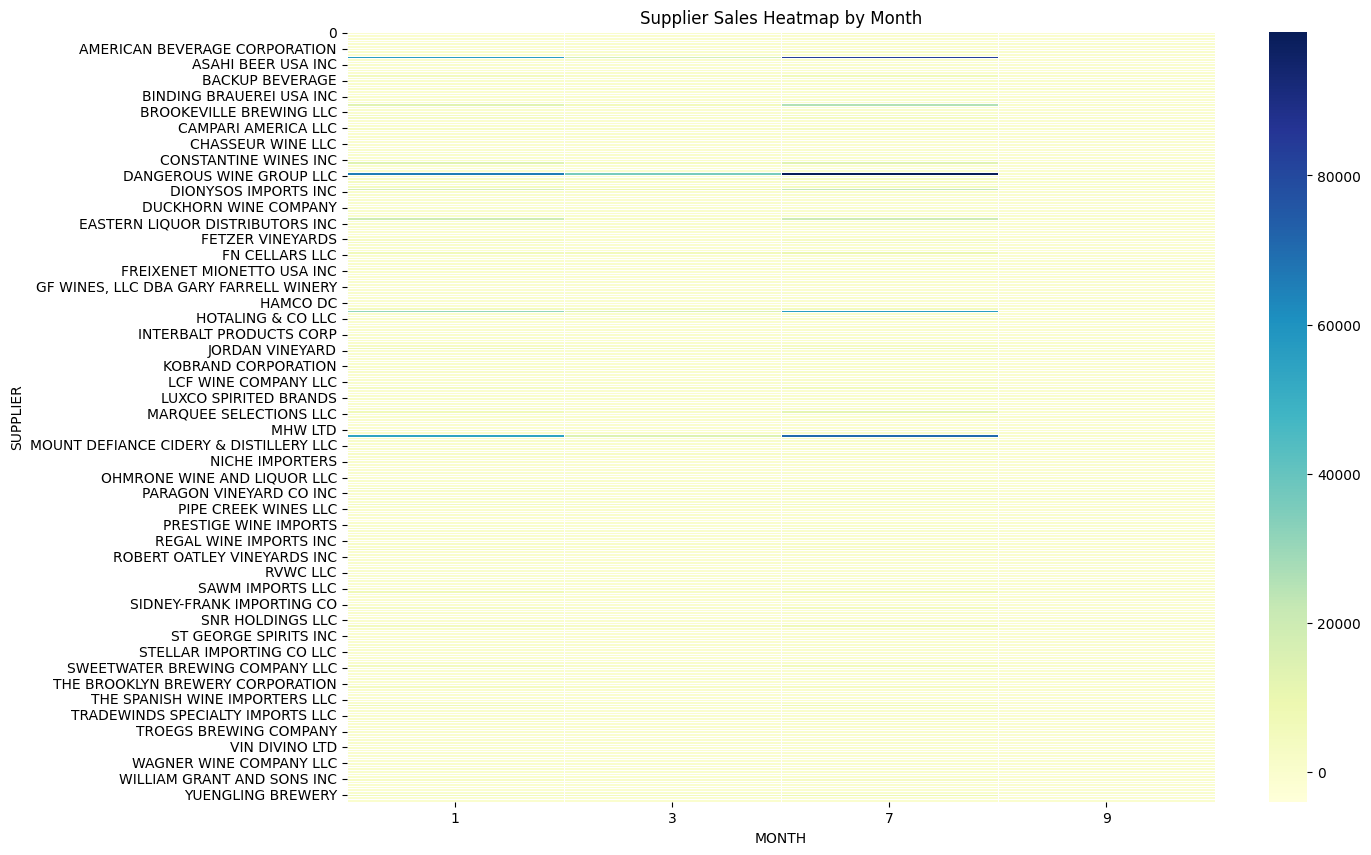

In [ ]:
#Monthly Supplier Sales Heatmap

supplier_month_matrix = df.pivot_table(index='SUPPLIER', columns='MONTH', values='TOTAL SALES', aggfunc='sum').fillna(0)

plt.figure(figsize=(14, 10))
sns.heatmap(supplier_month_matrix, cmap='YlGnBu', linewidths=0.5)
plt.title("Supplier Sales Heatmap by Month")
plt.show()


In [ ]:
#YOY (Year-on-Year) Growth Analysis
yearly_sales = df.groupby('YEAR')['TOTAL SALES'].sum().pct_change().reset_index()
yearly_sales['GROWTH %'] = yearly_sales['TOTAL SALES'] * 100

print("📈 Year-on-Year Growth:")
print(yearly_sales)


📈 Year-on-Year Growth:
   YEAR  TOTAL SALES  GROWTH %
0  2020          NaN       NaN


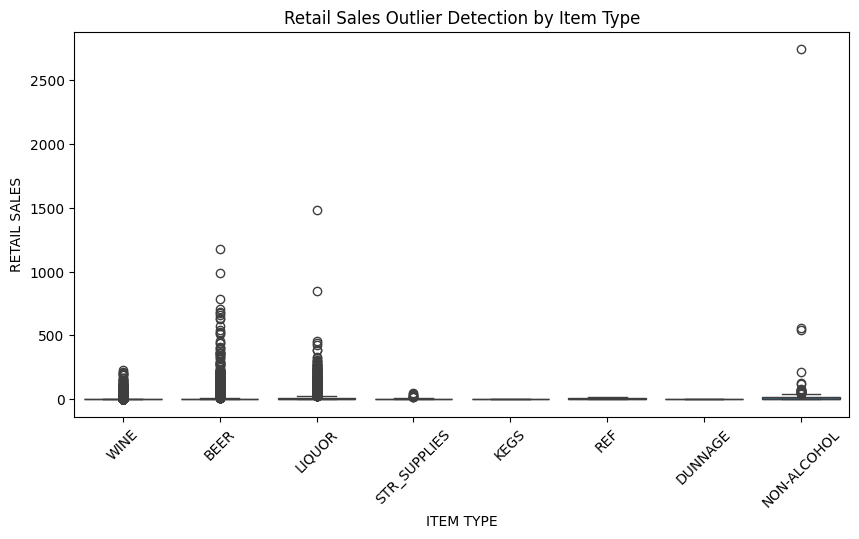

In [ ]:
# Outlier Detection in Retail Sales

plt.figure(figsize=(10, 5))
sns.boxplot(x='ITEM TYPE', y='RETAIL SALES', data=df)
plt.title("Retail Sales Outlier Detection by Item Type")
plt.xticks(rotation=45)
plt.show()


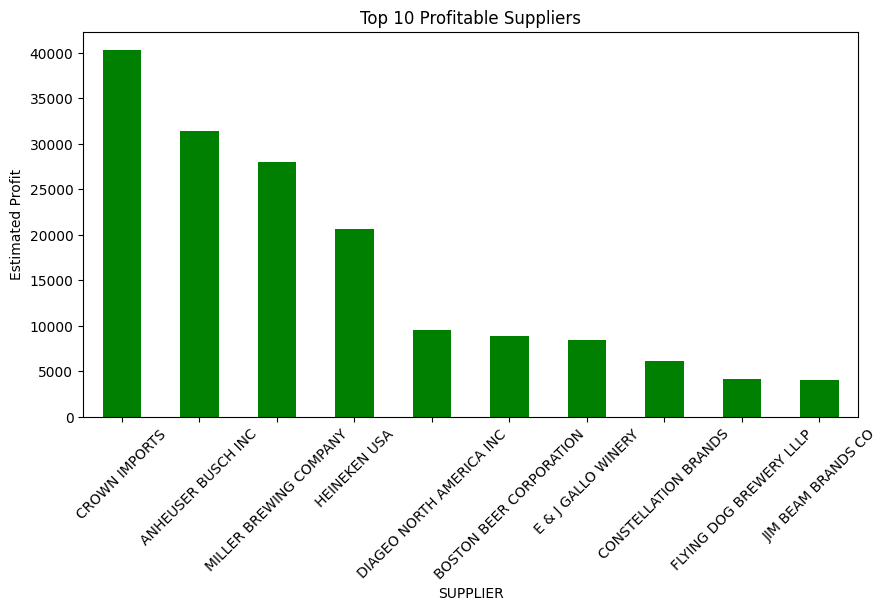

In [ ]:
# Most Profitable Suppliers
# If you assume profit = 20% of sales (as a proxy):

df['PROFIT'] = df['TOTAL SALES'] * 0.20
top_profit_suppliers = df.groupby('SUPPLIER')['PROFIT'].sum().sort_values(ascending=False).head(10)

top_profit_suppliers.plot(kind='bar', figsize=(10, 5), color='green')
plt.title("Top 10 Profitable Suppliers")
plt.ylabel("Estimated Profit")
plt.xticks(rotation=45)
plt.show()
